In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
measurement= pd.read_csv("Resources/hawaii_measurements.csv")
station= pd.read_csv("Resources/hawaii_stations.csv" )

In [9]:
measurement

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [10]:
station

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [11]:
measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
station    19550 non-null object
date       19550 non-null object
prcp       18103 non-null float64
tobs       19550 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 611.1+ KB


In [12]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), object(2)
memory usage: 488.0+ bytes


In [13]:
# Save references to each table
measurement = Base.classes.measurement
station= Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_prcp_query = session.query(measurement.date, measurement.prcp).\
filter(measurement.date >='2016-10-9', measurement.date <='2017-10-9').\
order_by(measurement.date).statement

In [16]:
date_prcp_df = pd.read_sql(date_prcp_query, engine).dropna()
date_prcp_df.head()

,date,prcp
0,2016-11-01,0.00
1,2016-11-01,0.01
2,2016-11-01,0.00
3,2016-11-01,0.01
4,2016-11-01,0.10


In [17]:
date_tob_query = session.query(measurement.date, measurement.tobs).\
filter(measurement.date >='2016-10-9', measurement.date <='2017-10-9').\
order_by(measurement.date).statement

In [18]:
date_tob_df = pd.read_sql(date_tob_query, engine).dropna()
date_tob_df.head()

,date,tobs
0,2016-11-01,77.0
1,2016-11-01,77.0
2,2016-11-01,77.0
3,2016-11-01,79.0
4,2016-11-01,74.0


In [19]:
date_prcp_df['date']  = pd.to_datetime(date_prcp_df['date'])

C:\Users\gargi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


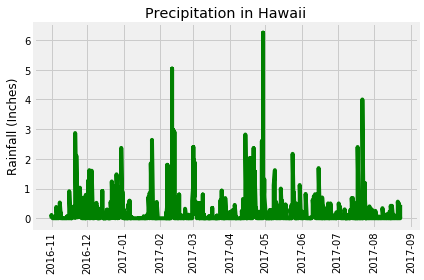

In [20]:


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores


plt.plot(date_prcp_df['date'], date_prcp_df['prcp'],color='g')
plt.title("Precipitation in Hawaii")
plt.xlabel('')
plt.ylabel('Rainfall (Inches)')
plt.xticks(rotation='90')
plt.tight_layout()
plt.savefig('Precipitation in Hawaii.png', bbox_inches = 'tight')
plt.show()

# Sort the dataframe by date



# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,prcp
count,1616.000000
mean,0.164790
std,0.432562
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
stat_query = engine.execute('SELECT COUNT(station) FROM station').fetchall()
station_count = stat_query[0][0]

print(f'There are {station_count} stations in the dataset.')

There are 9 stations in the dataset.


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
desc_observ = engine.execute('select station, count(station) from measurement group by station order by count(station) desc').fetchall()
desc_observ

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
USC281_query = engine.execute('SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE station = "USC00519281"').fetchall()
USC281_stats = USC281_query[0]
USC281_stats

(54.0, 85.0, 71.66378066378067)

In [25]:
USC281_plotquery = engine.execute('SELECT date , tobs FROM measurement WHERE station = "USC00519281" AND date > "2016-10-9"').fetchall()
USC281_plotquery

usc281_df = pd.DataFrame(USC281_plotquery)
usc281_df = usc281_df.rename(columns={0: 'date', 1: 'tobs'})
usc281_df.head()

,date,tobs
0,2016-11-01,74.0
1,2016-11-02,75.0
2,2016-11-03,75.0
3,2016-11-04,75.0
4,2016-11-05,75.0


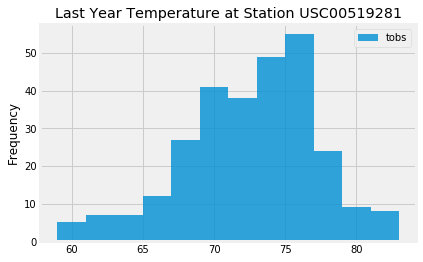

In [26]:
usc281_df.plot.hist(bins = 12, alpha=.8)
plt.title('Last Year Temperature at Station USC00519281')
plt.savefig('Last Year Temperature in Hawaii.png', bbox_inches = 'tight')

![precipitation](Images/station-histogram.png)

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
Temp=[]
start_date='2016-10-09'
end_date='2017-10-09'
def calc_temps(start_date, end_date):
    results=session.query(func.max(measurement.tobs).label("max_tobs"), \
                          func.min(measurement.tobs).label("min_tobs"),\
                          func.avg(measurement.tobs).label("avg_tobs")).\
                          filter(measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
    #print(str(TMAX))
    #print(str(TMIN))
    #print(str(TAVG))
calc_temps(start_date, end_date)
Temp

[87.0, 58.0, 74.08087091757388]

In [28]:
TAVG=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]

C:\Users\gargi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


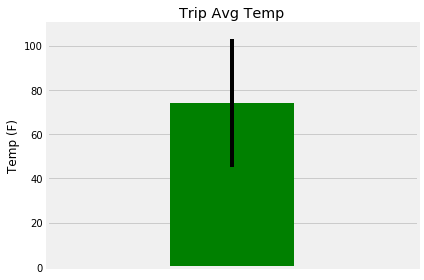

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar( 1,TAVG, color = 'g', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig('Trip Avg Temperature in Hawaii.png', bbox_inches = 'tight')
plt.show()

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
Rainfall_results = session.query(measurement.station, func.count(measurement.prcp)).\
                   group_by(measurement.station).filter(measurement.date.between('2016-10-01', '2017-10-01')).all()
Rainfall_results


# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00513117', 304),
 ('USC00514830', 237),
 ('USC00516128', 291),
 ('USC00517948', 51),
 ('USC00519281', 313),
 ('USC00519397', 322),
 ('USC00519523', 277)]

In [31]:
for i in range(1,16):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [32]:
from sqlalchemy import extract  
trip_month=10
trip_days=range(16, 30)
for i in range(16, 30):
    subquery=session.query(measurement.date).filter(extract('month', measurement.date)==trip_month).\
             filter(extract('day', measurement.date)== i ).group_by(measurement.date).order_by(measurement.date).all()
subquery

[('2010-10-29'),
 ('2011-10-29'),
 ('2012-10-29'),
 ('2013-10-29'),
 ('2014-10-29'),
 ('2015-10-29'),
 ('2016-10-29')]

## Optional Challenge Assignment

In [33]:
dates=[]
daily_normals_Three_AVG=[]
daily_normals_TMAX=[]
daily_normals_TMIN=[]
daily_normals_TAVG=[]

trip_month=8
trip_days=range(1, 16)

def daily_normals():
    
    for i in range(1,16):
        results=session.query(measurement.date.label("dates"), func.max(measurement.tobs).label("max_tobs"),\
                             func.min(measurement.tobs).label("min_tobs"),func.avg(measurement.tobs).label("avg_tobs")).\
                             filter(extract('month', measurement.date)==trip_month).\
                             filter(extract('day', measurement.date)== i ).group_by(measurement.date).order_by(measurement.date)
        results
        for res in results.all():
             print( res)
        
        res
        TMAX = res.max_tobs
        TMIN= res.min_tobs
        TAVG= res.avg_tobs
        Date= res.dates
        
        data = [TMAX, TMIN, TAVG]
        #avg = [float(sum(col))/len(col) for col in zip(*data)]

        dates.append(Date)
        #daily_normals_Three_AVG.append(avg)
        daily_normals_TMAX.append(TMAX)
        daily_normals_TMIN.append(TMIN)
        daily_normals_TAVG.append(TAVG)
        
daily_normals()

('2010-08-01', 77.0, 71.0, 73.42857142857143)
('2011-08-01', 78.0, 67.0, 73.375)
('2012-08-01', 79.0, 71.0, 75.85714285714286)
('2013-08-01', 79.0, 75.0, 76.83333333333333)
('2014-08-01', 83.0, 73.0, 77.42857142857143)
('2015-08-01', 79.0, 73.0, 77.4)
('2016-08-01', 78.0, 73.0, 76.16666666666667)
('2017-08-01', 77.0, 72.0, 74.5)
('2010-08-02', 76.0, 70.0, 73.22222222222223)
('2011-08-02', 77.0, 70.0, 73.625)
('2012-08-02', 78.0, 68.0, 73.5)
('2013-08-02', 78.0, 70.0, 74.57142857142857)
('2014-08-02', 81.0, 73.0, 77.71428571428571)
('2015-08-02', 84.0, 76.0, 80.0)
('2016-08-02', 80.0, 72.0, 76.57142857142857)
('2017-08-02', 83.0, 73.0, 79.0)
('2010-08-03', 77.0, 70.0, 73.11111111111111)
('2011-08-03', 78.0, 71.0, 75.25)
('2012-08-03', 78.0, 72.0, 74.57142857142857)
('2013-08-03', 79.0, 72.0, 76.66666666666667)
('2014-08-03', 83.0, 74.0, 78.33333333333333)
('2015-08-03', 85.0, 75.0, 80.0)
('2016-08-03', 82.0, 74.0, 78.42857142857143)
('2017-08-03', 81.0, 76.0, 79.0)
('2010-08-04', 77.0, 

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

Daily_normals_df= pd.DataFrame({'Date': dates, 'TMAX': daily_normals_TMAX, 'TMIN': daily_normals_TMIN,'TAVG': daily_normals_TAVG,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


,TMAX,TMIN,TAVG
Date,,,
2017-08-01,77.0,72.0,74.5
2017-08-02,83.0,73.0,79.0
2017-08-03,81.0,76.0,79.0
2017-08-04,82.0,77.0,80.0
2017-08-05,82.0,77.0,80.0


In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
Daily_normals_df= pd.DataFrame({'Date': dates, 'TMAX': daily_normals_TMAX, 'TMIN': daily_normals_TMIN,'TAVG': daily_normals_TAVG,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

,TMAX,TMIN,TAVG
Date,,,
2017-08-01,77.0,72.0,74.5
2017-08-02,83.0,73.0,79.0
2017-08-03,81.0,76.0,79.0
2017-08-04,82.0,77.0,80.0
2017-08-05,82.0,77.0,80.0


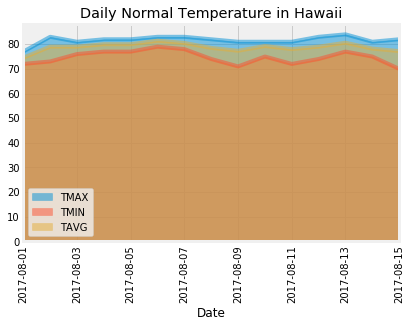

In [38]:
# Plot the daily normals as an area plot with `stacked=False`
Daily_normals_df.plot.area(stacked=False, title='Daily Normal Temperature in Hawaii')
ax.set_xlabel('Date')
plt.xticks(rotation='90')
plt.savefig('Daily Normal Temperature in Hawaii.png', bbox_inches = 'tight')
plt.show()